<a href="https://colab.research.google.com/github/Jabed-Hasan/python/blob/main/Nayeb_Vayes_SMS_spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sample data:
   label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

After converting labels:
    label                                            message
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...

Dataset Sizes:
Total: 5572
Train: 4179
Test: 1393

Accuracy: 98.85%

Classification Report:
              precision    recall  f1-score   support

         Ham       0.99      1.00      0.99      1208
        Spam       0.97      0.94      0.96

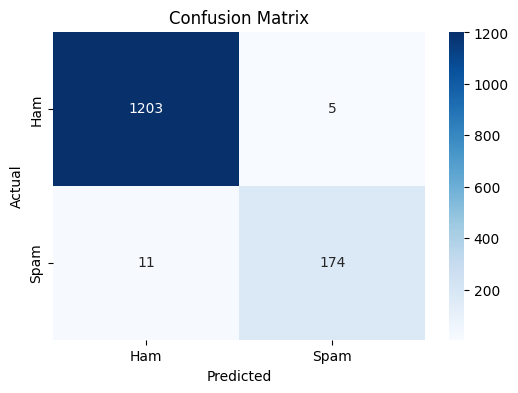

In [2]:
# ---------------------------------------
# Step 1: Import Required Libraries
# ---------------------------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report

# ---------------------------------------
# Step 2: Load the Dataset
# ---------------------------------------
# Dataset: https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection
# The file 'SMSSpamCollection' should be downloaded and placed in your working directory.

# Load the dataset into a DataFrame
df = pd.read_table('/content/sample_data/SMSSpamCollection', sep='\t', header=None, names=['label', 'message'])

# Preview the data
print("Sample data:\n", df.head())

# ---------------------------------------
# Step 3: Data Preprocessing
# ---------------------------------------
# Convert labels: 'ham' → 0, 'spam' → 1
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Check updated data
print("\nAfter converting labels:\n", df.head())

# ---------------------------------------
# Step 4: Split into Training and Test Sets
# ---------------------------------------
# Split dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], random_state=1)

print("\nDataset Sizes:")
print("Total:", df.shape[0])
print("Train:", X_train.shape[0])
print("Test:", X_test.shape[0])

# ---------------------------------------
# Step 5: Feature Extraction using Bag of Words
# ---------------------------------------
# Convert text messages into Bag of Words features
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)  # Learn vocab from training
X_test_counts = vectorizer.transform(X_test)        # Transform test set with same vocab

# ---------------------------------------
# Step 6: Train Naïve Bayes Classifier
# ---------------------------------------
# Create and train the classifier
model = MultinomialNB()
model.fit(X_train_counts, y_train)

# ---------------------------------------
# Step 7: Evaluate the Model
# ---------------------------------------
# Make predictions on test set
y_pred = model.predict(X_test_counts)

# Calculate accuracy
accuracy = np.mean(y_pred == y_test)
print(f"\nAccuracy: {accuracy:.2%}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Optional: visualize Confusion Matrix with seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
